找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_0.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_1.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_2.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_3.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_4.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_5.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_6.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_7.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_8.pkl
找到文件: ../../AL_Comparision/KNN/KNN_DW/AL_round_9.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_0.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_1.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_2.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_3.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_4.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_5.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_6.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round_7.pkl
找到文件: ../../AL_Comparision/KNN/KNN_GD/AL_round

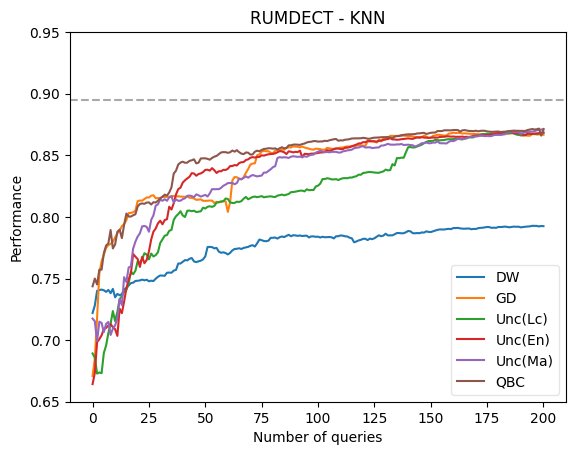

In [1]:
import alipy
from alipy import experiment
from alipy.experiment import ExperimentAnalyser
import os


def load_models_folds(model, num_files,strategy,directory=None):
    model_folds=[]
    if directory is None:
        directory='../../AL_Comparision/'+str(model)+'/'+str(model)+'_'+str(strategy)
    for i in range(num_files):
        file_name = 'AL_round_' + str(i) + '.pkl'
        file_path = os.path.join(directory, file_name)

        if os.path.isfile(file_path):
            # 这里可以对找到的文件进行操作或处理
            file = alipy.experiment.StateIO.load(file_path)
            model_folds.append(file)
            print('找到文件:', file_path)
        else:
            print('未找到文件:', file_path)
    return model_folds

model='KNN'
#加载策略folds
DW_folds =load_models_folds(model=model, num_files=10,strategy='DW')
GD_folds =load_models_folds(model=model, num_files=10,strategy="GD")
Unc_LC_folds =load_models_folds(model=model, num_files=10,strategy="Unc_LC")
Unc_Entropy_folds=load_models_folds(model=model, num_files=10,strategy="Unc_Entropy")
Unc_Margin_folds=load_models_folds(model=model, num_files=10,strategy="Unc_Margin")
#Rnd_folds =load_models_folds(model=model, num_files=10,strategy='Rnd')
QBC_folds =load_models_folds(model=model, num_files=10,strategy="QBC")

#初始化StateIOContainer
StateIOContainer_DW = alipy.experiment.StateIOContainer(method_name='DW', method_results=[])
StateIOContainer_GD = alipy.experiment.StateIOContainer(method_name='GD', method_results=[])
StateIOContainer_Unc_LC = alipy.experiment.StateIOContainer(method_name='Unc_LC', method_results=[])
StateIOContainer_Unc_Entropy = alipy.experiment.StateIOContainer(method_name='Unc_Entropy', method_results=[])
StateIOContainer_Unc_Margin = alipy.experiment.StateIOContainer(method_name='Unc_Margin', method_results=[])
#StateIOContainer_Rnd = alipy.experiment.StateIOContainer(method_name='Rnd', method_results=[])
StateIOContainer_QBC = alipy.experiment.StateIOContainer(method_name='QBC', method_results=[])
#将folds装载进StateIOContainer
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_DW, folds=DW_folds)
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_GD, folds=GD_folds)
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_Unc_LC, folds=Unc_LC_folds)
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_Unc_Entropy, folds=Unc_Entropy_folds)
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_Unc_Margin, folds=Unc_Margin_folds)
#alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_Rnd, folds=Rnd_folds)
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_QBC, folds=QBC_folds)

#使用analyser分析绘图
analyser1 = ExperimentAnalyser()

analyser1.add_method(method_name='DW', method_results=StateIOContainer_DW)
analyser1.add_method(method_name='GD', method_results=StateIOContainer_GD)
analyser1.add_method(method_name='Unc(Lc)', method_results=StateIOContainer_Unc_LC)
analyser1.add_method(method_name='Unc(En)', method_results=StateIOContainer_Unc_Entropy)
analyser1.add_method(method_name='Unc(Ma)', method_results=StateIOContainer_Unc_Margin)
#analyser1.add_method(method_name='Rnd', method_results=StateIOContainer_Rnd)
analyser1.add_method(method_name='QBC', method_results=StateIOContainer_QBC)

#analyser1.plot_learning_curves(title='RUMDECT')
plt_Ada=analyser1.plot_learning_curves(title='RUMDECT - KNN',show=False)
plt_Ada.ylim(0.65, 0.95)
plt_Ada.axhline(y=0.895, color='darkgray', linestyle='--', label='Horizontal Line')
plt_Ada.show()
